In [ ]:
import numpy as np
layer_structure = [5, 6, 2]
weights = {i: np.random.rand(element, layer_structure[i+1]) for i, element in enumerate(layer_structure[:-1])}
weights[0].shape

In [1]:
import csv
import pandas as pd
import seaborn as sns
from data_analysis.loss_function import *
from data_analysis.main import *
from data_analysis.optimizer import *

data_titanic = pd.read_csv("train.csv")
data_ = csv.reader(open("train.csv"))
header = data_.__next__()
data = list(data_)
target = [float(d[1]) for d in data]

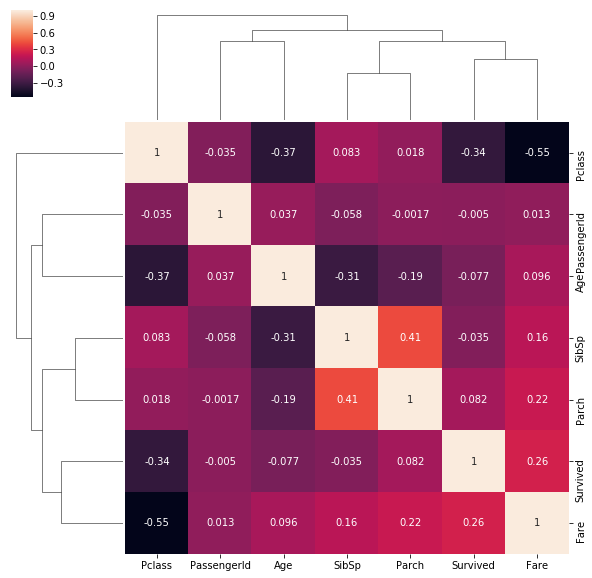

In [5]:
sns.clustermap(data_titanic.corr(), annot=True)

In [9]:
data_titanic.corr()['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [2]:
def filter_str_to_float(x):
    try:
        return float(x)
    except ValueError:
        return x

In [3]:
data_wo_str = [[filter_str_to_float(d) for  d in line[2:]] for line in data]

In [4]:
data_wo_str[0]

[3.0,
 'Braund, Mr. Owen Harris',
 'male',
 22.0,
 1.0,
 0.0,
 'A/5 21171',
 7.25,
 '',
 'S']

In [5]:
print(header)

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [6]:
def sex_to_float(gender):
    if gender=='male':
        return 0
    elif gender=='female':
        return 1
    else:
        return -1

In [7]:
data_gender = data_wo_str[:]

In [8]:
import pandas as pd

In [9]:
data_pd = pd.read_csv('train.csv', index_col=0)
data_pd.tail(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
import numpy as np
from data_analysis.main import *
from data_analysis.loss_function import *
from data_analysis.optimizer import *

In [11]:
usable = np.array(data_pd[['Pclass', 'SibSp', 'Parch', 'Fare']])
usable

array([[ 3.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  1.    ,  0.    , 71.2833],
       [ 3.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 3.    ,  1.    ,  2.    , 23.45  ],
       [ 1.    ,  0.    ,  0.    , 30.    ],
       [ 3.    ,  0.    ,  0.    ,  7.75  ]])

In [12]:
obj = Model(usable, target, LogLikelihood)

There are 4 options of optimizers
1. Normal Stochastic Gradient
2. Momentum SGD
3. AdaGrad SGD
4. Adam(combination of Momentum SGD and AdaGrad)
5. Nesterov
Type in the number of what to optimize : 1


In [13]:
obj.train()

38.38383838383838
69.24803591470258


In [14]:
obj.beta

array([ 0.3048347 , -0.66284619, -0.47865849,  0.24812817,  0.04473858])

In [84]:
momentum = Model(usable, target, LogLikelihood)

There are 4 options of optimizers
1. Normal Stochastic Gradient
2. Momentum SGD
3. AdaGrad SGD
4. Adam(combination of Momentum SGD and AdaGrad)
5. Nesterov
Type in the number of what to optimize : 4


In [85]:
momentum.beta

array([ 0.79570203,  0.15019867,  0.15842086, -0.72789948,  0.16126525])

In [86]:
momentum.train()

342
549


In [87]:
momentum.beta

array([ 0.37969487, -0.52275596, -0.24729587,  0.29572181, -0.00611119])

In [88]:
momentum.train()

549
615


In [89]:
momentum.beta

array([ 0.3822054 , -0.54965104, -0.16453177,  0.286744  ,  0.02929011])

In [90]:
momentum.train()

615
613


In [91]:
momentum.beta = np.array([ 0.3822054 , -0.54965104, -0.16453177,  0.286744  ,  0.02929011])

In [93]:
momentum.loss_function.accuracy(momentum.beta)

615


69.02356902356902

In [71]:
data_pd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 123.5+ KB


In [95]:
data_pd['Ticket'].value_counts()

1601                7
CA. 2343            7
347082              7
347088              6
3101295             6
CA 2144             6
382652              5
S.O.C. 14879        5
4133                4
19950               4
2666                4
113781              4
347077              4
349909              4
LINE                4
PC 17757            4
17421               4
113760              4
W./C. 6608          4
PC 17572            3
110413              3
C.A. 31921          3
SC/Paris 2123       3
347742              3
363291              3
F.C.C. 13529        3
345773              3
35273               3
371110              3
230080              3
                   ..
11755               1
363294              1
36864               1
113043              1
C 17369             1
230434              1
347073              1
244373              1
A/5 3902            1
347074              1
6563                1
248723              1
349210              1
349207              1
345783    

In [15]:
obj_df = data_pd.select_dtypes(include=['object']).copy()
obj_df.head()

,Name,Sex,Ticket,Cabin,Embarked
PassengerId,,,,,
1,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
5,"Allen, Mr. William Henry",male,373450,NaN,S


In [3]:
import pandas as pd
train = pd.read_csv('train.csv')

In [4]:
from sklearn.preprocessing import LabelEncoder

def gender_to_int(data):
    le = LabelEncoder()
    le.fit(["male", "female"])
    data["Sex"] = le.transform(data["Sex"])
    return data

train_g_i = gender_to_int(train)

In [5]:
train_g_i

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C


In [10]:
#train.set_index('Survived')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C


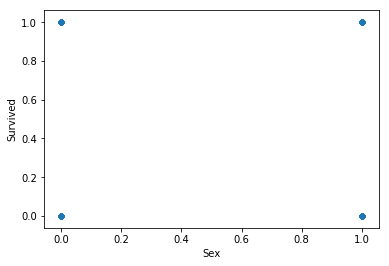

In [11]:
train.plot(kind='scatter', x='Sex', y='Survived')